<a href="https://colab.research.google.com/github/rinutresamj/DeepLearning/blob/main/Customer_churn_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementing customer churn model using Artificial Nueral Networks

In [ ]:
!pip install tensorflow-gpu


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Dividing the dataset into dependent and independent features

In [ ]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
#feature engineering
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
#concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
X=pd.concat([X,geography,gender],axis=1)

In [ ]:
from pandas.io.pytables import Selection
#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
#Create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
#lets initialize ANN
classifier=Sequential()


In [ ]:
#Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
#Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [ ]:
#Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [ ]:
#Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#Early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 6s 5ms/step - loss: 0.5222 - accuracy: 0.7873 - val_loss: 0.4651 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4464 - accuracy: 0.7962 - val_loss: 0.4429 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.4295 - accuracy: 0.8028 - val_loss: 0.4338 - val_accuracy: 0.8095
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4190 - accuracy: 0.8205 - val_loss: 0.4248 - val_accuracy: 0.8217
Epoch 5/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.4075 - accuracy: 0.8302 - val_loss: 0.4184 - val_accuracy: 0.8285
Epoch 6/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3954 - accuracy: 0.8341 - val_loss: 0.4019 - val_accuracy: 0.8319
Epoch 7/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3805 - accuracy: 0.8408 - val_loss: 0.3910 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

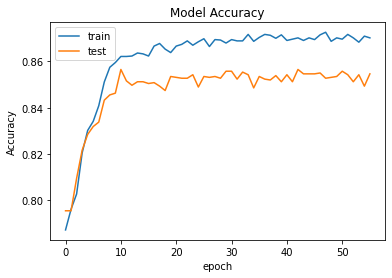

In [ ]:
#summarize the accuarcy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper left')
plt.show()

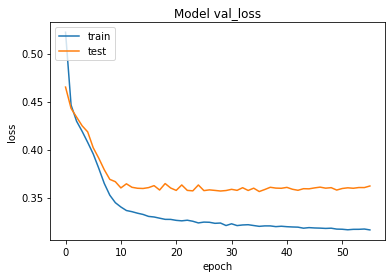

In [ ]:
#summarize the accuarcy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model val_loss')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
#prediction
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 2ms/step


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1532   63]
 [ 214  191]]


In [ ]:
#calculate accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print(score)

0.8615


In [ ]:
#get the weights
classifier.get_weights()

[array([[-6.78743601e-01,  4.72133130e-01, -2.73058385e-01,
         -2.41985828e-01, -9.20824334e-02,  1.62723497e-01,
         -7.26530254e-02, -1.11520149e-01, -4.92947549e-01,
         -1.14052877e-01,  2.35955924e-01],
        [-4.40676540e-01, -4.09683138e-01,  9.87616599e-01,
         -2.72108048e-01,  3.10748011e-01, -7.80882597e-01,
          3.14560741e-01,  2.07708567e-01, -3.70492876e-01,
          1.05595618e-01, -2.63000637e-01],
        [-3.08565736e-01, -2.94954211e-01, -2.33711109e-01,
          2.11314783e-01,  4.17215466e-01, -8.75110552e-02,
         -2.08876319e-02,  9.50937159e-03,  3.14242989e-01,
         -3.96605968e-01,  1.07612479e-02],
        [-1.03192635e-01, -3.34390849e-01, -6.15209281e-01,
         -6.16593838e-01, -1.42077357e-01, -1.16572678e-01,
         -3.18633080e-01, -1.70319840e-01, -9.01213959e-02,
          3.48703891e-01, -9.26412642e-01],
        [-1.91753760e-01,  7.41341710e-02,  9.30814072e-02,
         -1.39314130e-01, -9.51782688e-02, -